In [21]:
from pylab import *
from scipy.integrate import *
from scipy.optimize import *

In [2]:
def pendulo(t,th_vth,omega2=1):
    return array([th_vth[1],-omega2*sin(th_vth[0])])

def E_pendulo(th_vth,omega2=1):
    return 0.5*(th_vth[1]**2) + omega2*(1-cos(th_vth[0]))

In [3]:
intervalo = (0,100*pi)
ci = [2,0]
Ei = E_pendulo(ci)
print('Energía inicial:',Ei)
th_vth = solve_ivp(pendulo,intervalo,ci,atol=1e-8,rtol=1e-8,dense_output=True)
Ef = E_pendulo([th_vth.y[0][-1],th_vth.y[1][-1]])
print('Energía final:',Ef,'\t Num. puntos de integración: ' ,len(th_vth.t) )
err_E = abs(Ef-Ei)/Ei
err_E_p = 100*abs(Ef-Ei)/Ei
print('Error en la Energía: ', err_E)
print('Error porcentual de la Energía: ',err_E_p)

Energía inicial: 1.4161468365471424
Energía final: 1.416145479022151 	 Num. puntos de integración:  2425
Error en la Energía:  9.586046843968087e-07
Error porcentual de la Energía:  9.586046843968088e-05


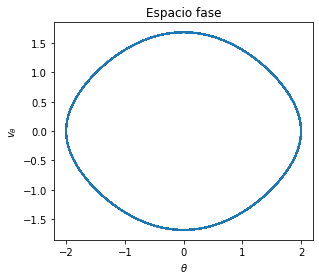

In [4]:
t = linspace(intervalo[0],intervalo[-1],15000)
esp_fase = th_vth.sol(t)
title(r'Espacio fase')
plot(esp_fase[0],esp_fase[1])
xlabel(r'$\theta$'),ylabel(r'$v_{\theta}$')
gca().set_aspect('equal')
show()

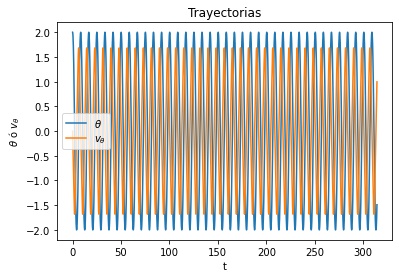

In [5]:
title(r'Trayectorias')
plot(t,esp_fase[0],label=r'$\theta$')
plot(t,esp_fase[1],label=r'$v_{\theta}$')
xlabel(r't'),ylabel(r'$\theta$ ó $v_{\theta}$')
legend()
#gca().set_aspect('equal')
show()

In [6]:
intervalo = (0,10*pi)
N_tray , N_puntos = 15 , 500
t = linspace(intervalo[0],intervalo[1],N_puntos)
th_0s = linspace(0.1,pi-0.1,N_tray)
trayectorias = zeros((2,N_puntos,N_tray))
E_tray = zeros((N_puntos,N_tray))
tray_f = [ 0 for i in range(N_tray)]
for i in range(N_tray):
    ci = [th_0s[i],0]
    th_vth = solve_ivp(pendulo,intervalo,ci,atol=1e-8,rtol=1e-8,dense_output=True)
    tray_f[i] = th_vth.sol
    th , vth = th_vth.sol(t)
    E_tray[:,i] = E_pendulo([th,vth])
    trayectorias[:,:,i] = th , vth

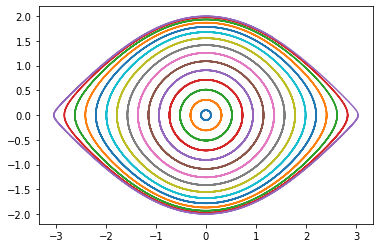

In [7]:
for i in range(N_tray):
    plot(trayectorias[0,:,i],trayectorias[1,:,i])
show()

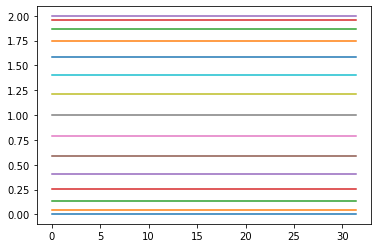

In [8]:
for i in range(N_tray):
    plot(t,E_tray[:,i])
show()

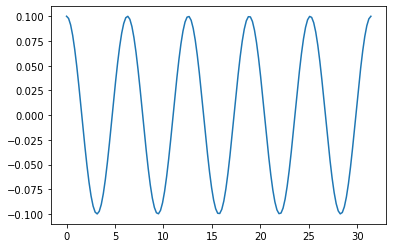

In [12]:
t = linspace(intervalo[0],intervalo[1],150)
th , vth = tray_f[0](t)
plot(t,th)
show()

In [37]:
def intervalos_raices_N(x,f):
    contador = []
    for i in range(len(f)-1):
        if f[i]*f[i+1] < 0:
            contador.append(x[i])
    return array(contador)

def raiz_Newton( f , x0 , comp , error=1e-6):
    f0 , dif , h = 2*error , 2*error ,  1e-2
    while abs(f0) > error and dif > error:
        x0_old = x0
        f0 = f(x0)[comp]
        df0 = (f(x0+h)[comp]-f(x0-h)[comp])/(2*h) 
        x0 = x0 - f0/df0
        dif = abs(x0 - x0_old)
    return x0 

def raices_f(f,x0s,comp):
    raices = zeros_like(x0s)
    for i in range(len(x0s)):
        raices[i] = raiz_Newton(f,x0s[i],comp)
    return raices

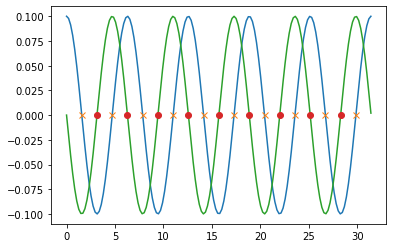

In [45]:
pt_ini = intervalos_raices_N(t,th)
x0s = raices_f(tray_f[0],pt_ini,0)
plot(t,th)
plot(x0s,np.zeros(len(x0s)),'x')

pt_ini = intervalos_raices_N(t,vth)
x0s = raices_f(tray_f[0],pt_ini,1)
plot(t,vth)
plot(x0s,np.zeros(len(x0s)),'o')

show()

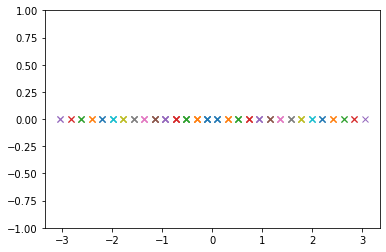

In [55]:
t = linspace(intervalo[0],intervalo[1],N_puntos)
for i in range(N_tray):
    #plot(trayectorias[0,:,i],trayectorias[1,:,i])
    pt_ini = intervalos_raices_N(t,trayectorias[1,:,i])
    x0s = raices_f(tray_f[i],pt_ini,1)
    #print(len(x0s))
    th_vth_0 = tray_f[i](x0s)
    plot(th_vth_0[0],th_vth_0[1],'x')
    ylim([-1,1])
show()

$$
\ddot \theta + \gamma \dot \theta + \omega _0 ^2 \sin(\theta ) = 0
$$

$$
\dot \theta = v_{\theta} \\
\dot v_{\theta} = -\gamma v_{\theta} - \omega _0 ^2 \sin(\theta )
$$

In [56]:
def pendulo_fric(t,th_vth,omega2=1,gam=0.1):
    return array([th_vth[1],-gam*th_vth[1] -omega2*sin(th_vth[0])])

In [58]:
intervalo = (0,10*pi)
N_tray , N_puntos = 15 , 500
t = linspace(intervalo[0],intervalo[1],N_puntos)
th_0s = linspace(0.1,pi-0.1,N_tray)
trayectorias = np.zeros((2,N_puntos,N_tray))
E_tray = np.zeros((N_puntos,N_tray))
tray_f = [ 0 for i in range(N_tray)]
for i in range(N_tray):
    ci = [th_0s[i],0]
    th_vth = solve_ivp(pendulo_fric,intervalo,ci,atol=1e-8,rtol=1e-8,dense_output=True)
    tray_f[i] = th_vth.sol
    th , vth = th_vth.sol(t)
    E_tray[:,i] = E_pendulo([th,vth])
    trayectorias[:,:,i] = th , vth

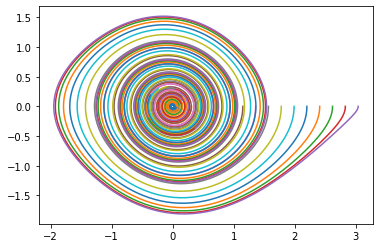

In [59]:
for i in range(N_tray):
    plot(trayectorias[0,:,i],trayectorias[1,:,i])
show()